# Credit Card Fraud Detection

# Objective

The objective of this project is to develop a robust machine
learning model capable of accurately detecting fraudulent credit card transactions in real-time.
Utilizing a dataset containing transaction details such as transaction amount, merchant
category, cardholder information, transaction location, the aim is to build a predictive model
that can effectively differentiate between legitimate and fraudulent transactions.

# Dataset Attributes

**Transaction_ID**: Unique identifier for each credit card transaction.

**Card_Type:** Type of credit card used in the transaction (Visa, Mastercard, RuPay, American
Express).

**Merchant_Category**: Category of the merchant where the transaction took place (Retail, Online Shopping, Dining, Entertainment, Healthcare, Education, Transportation, Utility bill).

**Transaction_Amount**: The amount of money involved in the transaction.

**Transaction_DateTime**: Date and Time of the transaction.

**Location**: City where the transaction occurred (Mumbai, Delhi, Bengaluru, Kolkata, Chennai,
Hyderabad, Kochi, Pune, Ahmedabad, Surat, Jaipur, Lucknow, Patna).

**Region**: Region where the transaction occurred (North, South, West, East).

**Cardholder_Age**: Age of the Cardholder in years.

**Cardholder_Gender**: Gender of the cardholder (Male or Female).

**Cardholder_Monthly_Income**: Monthly income of the cardholder.

**Cardholder_Average_Spend**: The average amount spent by the cardholder.

**Credit_Limit**: Maximum amount of credit extended to the cardholder by the issuing bank (50000,100000, 150000, 200000).

**Device_Type**: Type of device used for the transaction (Mobile, Desktop, Point-of-Sale Terminal,Contactless Payment Device, Unknown).

**Day_of_Week**: Day of the week when the transaction took place.
Is_Fraudulent Indicator of whether the transaction is fraudulent or not (Yes/No).


# Importing Packages and Loading Dataset

In [2]:
# Importing Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Creating Dataframe and loading the dataset
df = pd.read_csv('https://raw.githubusercontent.com/ArchanaInsights/Datasets/refs/heads/main/credit_card_transactions.csv')
df.head()

,Transaction_ID,Card_Type,Merchant_Category,Transaction_Amount,Transaction_DateTime,Location,Region,Cardholder_Age,Cardholder_Gender,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit,Device_Type,Day_of_Week,Is_Fraudulent
0,W963UK57,Mastercard,Utility bill,27214.0,2020-01-01 09:43:17,Patna,East,23.0,Female,94632.0,36369.65,100000.0,Unknown,Wednesday,No
1,V606KV56,American Express,Retail,83956.0,2020-01-03 16:26:13,Surat,West,49.0,Male,148118.0,89179.12,150000.0,Desktop,Friday,No
2,R531NU70,Visa,Transportation,193280.0,2020-01-04 03:40:49,Patna,East,NaN,Male,210921.0,106668.60,200000.0,Desktop,Saturday,No
3,T783GF79,RuPay,Online Shopping,167381.0,2020-01-04 14:56:24,Surat,West,52.0,Female,148070.0,173155.52,200000.0,Desktop,Saturday,Yes
4,K256ZN73,RuPay,Retail,81170.0,2020-01-04 17:26:47,Lucknow,North,37.0,Female,174470.0,52713.09,200000.0,Mobile,Saturday,No


# Exploratory Data Analysis(EDA)


In [3]:
# Cloning Dataset
df2 = df.copy()
df2.head()

# Basic understanding of Dataset
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Transaction_ID             5000 non-null   object 
 1   Card_Type                  4983 non-null   object 
 2   Merchant_Category          4978 non-null   object 
 3   Transaction_Amount         4994 non-null   float64
 4   Transaction_DateTime       5000 non-null   object 
 5   Location                   5000 non-null   object 
 6   Region                     5000 non-null   object 
 7   Cardholder_Age             4865 non-null   float64
 8   Cardholder_Gender          4911 non-null   object 
 9   Cardholder_Monthly_Income  4686 non-null   float64
 10  Cardholder_Average_Spend   4792 non-null   float64
 11  Credit_Limit               4991 non-null   float64
 12  Device_Type                4960 non-null   object 
 13  Day_of_Week                5000 non-null   objec

In [4]:
# Perform basic statistical measures
df2.describe()

,Transaction_Amount,Cardholder_Age,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit
count,4994.000000,4865.000000,4686.000000,4792.000000,4991.000000
mean,74667.995995,49.106680,137353.817542,63058.343566,124654.377880
std,43089.045623,18.398524,69471.623020,40056.989704,55668.246494
min,25008.000000,18.000000,35005.000000,10282.410000,50000.000000
25%,39742.500000,33.000000,73485.000000,33336.742500,100000.000000
50%,60922.000000,49.000000,131833.000000,49547.945000,100000.000000
75%,98373.500000,65.000000,189054.250000,83732.352500,150000.000000
max,199923.000000,80.000000,299907.000000,199898.290000,200000.000000


In [5]:
# No.of rows and columns
df2.shape

(5000, 15)

In [6]:
# Finding Missing values
df2.isnull().sum()

,0
Transaction_ID,0
Card_Type,17
Merchant_Category,22
Transaction_Amount,6
Transaction_DateTime,0
Location,0
Region,0
Cardholder_Age,135
Cardholder_Gender,89
Cardholder_Monthly_Income,314


In [7]:
# Only Missing columns
missing_cols = df2.columns[df2.isnull().sum() > 0]
print(missing_cols)

Index(['Card_Type', 'Merchant_Category', 'Transaction_Amount',
       'Cardholder_Age', 'Cardholder_Gender', 'Cardholder_Monthly_Income',
       'Cardholder_Average_Spend', 'Credit_Limit', 'Device_Type'],
      dtype='object')


In [8]:
missing_values = {
    "Numerical": df2.select_dtypes(include=['number']).isnull().sum().loc[lambda x:x > 0],
    "Categorical": df2.select_dtypes(include=['object']).isnull().sum().loc[lambda x:x > 0]
}
print(missing_values)

{'Numerical': Transaction_Amount             6
Cardholder_Age               135
Cardholder_Monthly_Income    314
Cardholder_Average_Spend     208
Credit_Limit                   9
dtype: int64, 'Categorical': Card_Type            17
Merchant_Category    22
Cardholder_Gender    89
Device_Type          40
dtype: int64}


In [9]:
# Checking Duplicates
df2.duplicated().sum()

0

In [10]:
# Finding unique values in each column
df2.nunique()

,0
Transaction_ID,5000
Card_Type,4
Merchant_Category,8
Transaction_Amount,4873
Transaction_DateTime,5000
Location,13
Region,4
Cardholder_Age,63
Cardholder_Gender,2
Cardholder_Monthly_Income,4628


In [11]:
# Finding categorical columns with unique value counts
categorical_columns = df2.columns[df2.nunique() < 10]
for col in categorical_columns:
  print(f"Unique values in '{col}': {df2[col].unique()}")

Unique values in 'Card_Type': ['Mastercard' 'American Express' 'Visa' 'RuPay' nan]
Unique values in 'Merchant_Category': ['Utility bill' 'Retail' 'Transportation' 'Online Shopping'
 'Entertainment' 'Education' 'Dining' 'Healthcare' nan]
Unique values in 'Region': ['East' 'West' 'North' 'South']
Unique values in 'Cardholder_Gender': ['Female' 'Male' nan]
Unique values in 'Credit_Limit': [100000. 150000. 200000.  50000.     nan]
Unique values in 'Device_Type': ['Unknown' 'Desktop' 'Mobile' 'Point-of-Sale Terminal'
 'Contactless Payment Device' nan]
Unique values in 'Day_of_Week': ['Wednesday' 'Friday' 'Saturday' 'Sunday' 'Tuesday' 'Thursday' 'Monday']
Unique values in 'Is_Fraudulent': ['No' 'Yes']


In [12]:
for col in df2.select_dtypes(include=['object']).columns:
  print(f"Value counts for {col}: \n{df2[col].value_counts()}\n")

Value counts for Transaction_ID: 
Transaction_ID
W963UK57    1
R295OK60    1
W909ES10    1
I854VI75    1
L709SZ79    1
           ..
L517PL65    1
W103JT18    1
R305EF32    1
R470GA64    1
D501WH15    1
Name: count, Length: 5000, dtype: int64

Value counts for Card_Type: 
Card_Type
Visa                1979
Mastercard          1540
RuPay                947
American Express     517
Name: count, dtype: int64

Value counts for Merchant_Category: 
Merchant_Category
Online Shopping    1019
Retail              959
Utility bill        521
Education           519
Entertainment       517
Healthcare          496
Dining              481
Transportation      466
Name: count, dtype: int64

Value counts for Transaction_DateTime: 
Transaction_DateTime
2020-01-01 09:43:17    1
2022-09-03 14:43:18    1
2022-09-06 14:43:37    1
2022-09-06 12:48:12    1
2022-09-05 20:15:26    1
                      ..
2021-05-12 18:02:34    1
2021-05-12 10:08:04    1
2021-05-12 08:09:17    1
2021-05-12 02:03:46    1
2023-

# EDA Visualization and Correlation

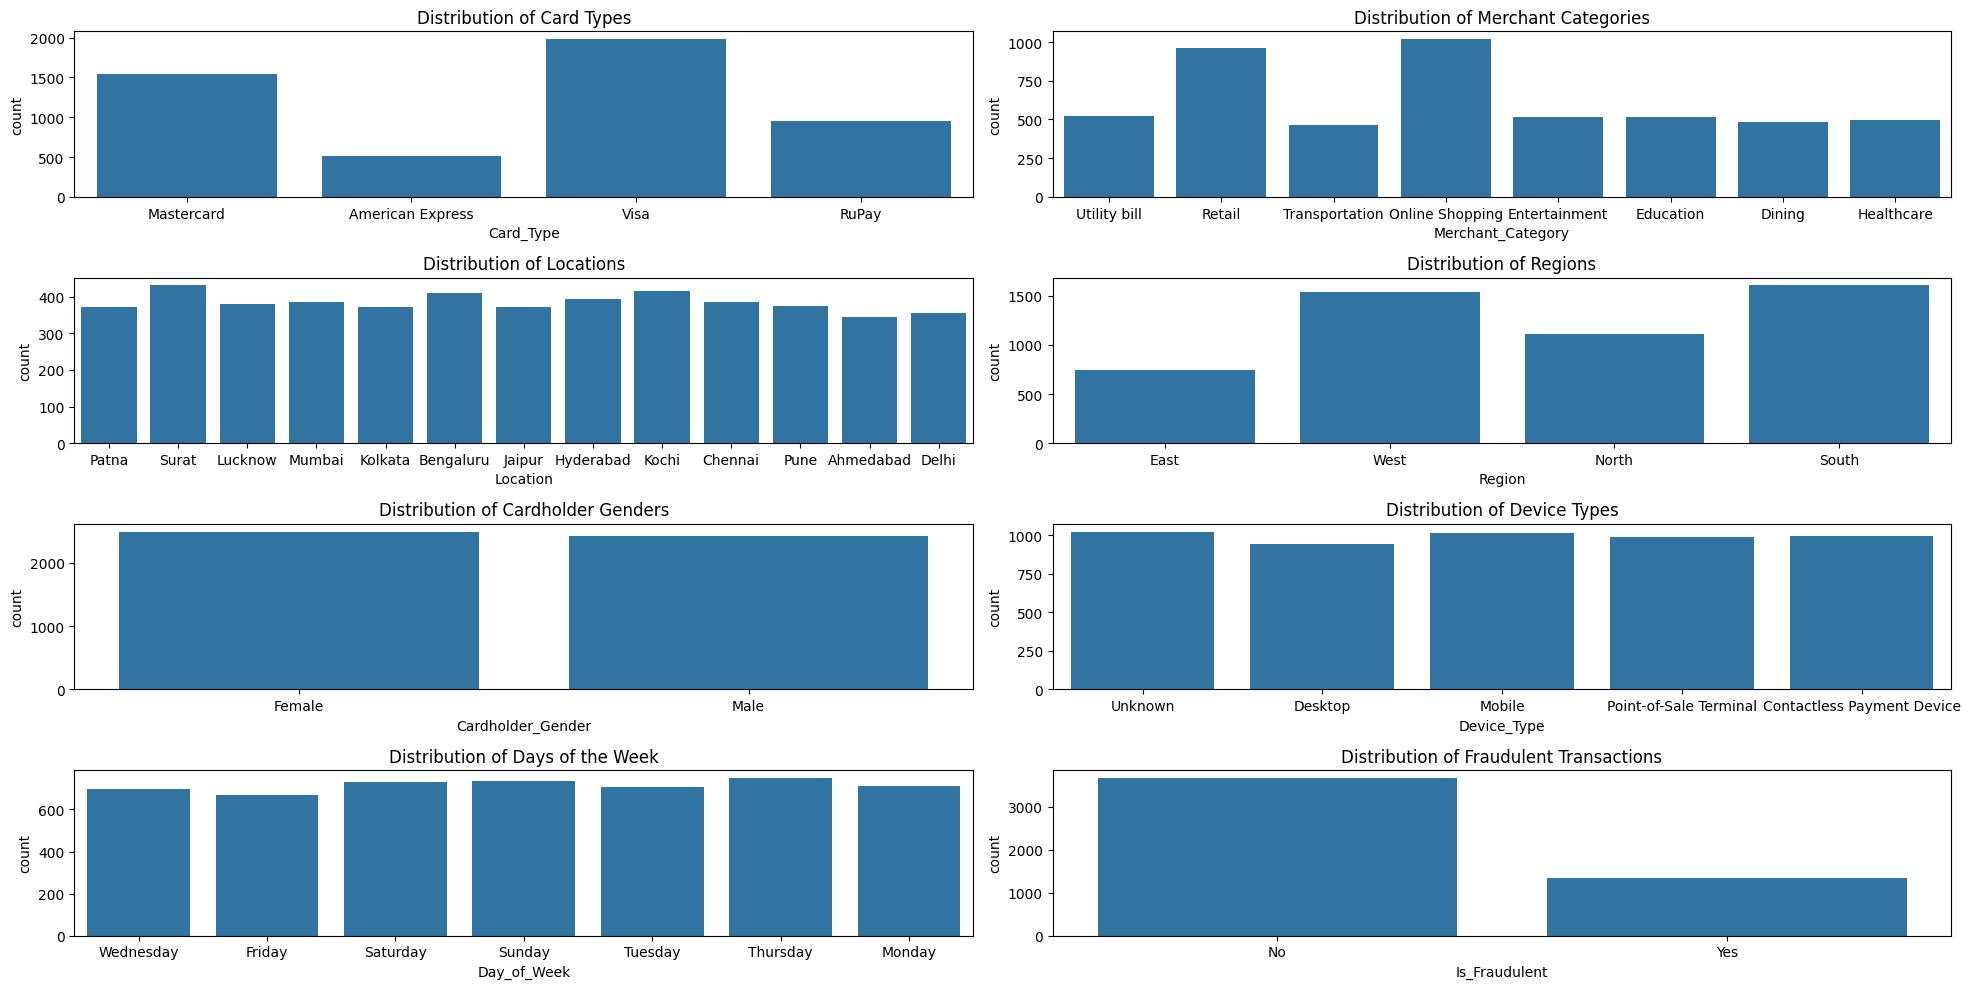

In [13]:
# Analyzing distribution of categorical columns using plot
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 10))
axes = axes.flatten()
sns.countplot(data=df2, x='Card_Type', ax=axes[0])
axes[0].set_title('Distribution of Card Types')
sns.countplot(data=df2, x='Merchant_Category', ax=axes[1])
axes[1].set_title('Distribution of Merchant Categories')
sns.countplot(data=df2, x='Location', ax=axes[2])
axes[2].set_title('Distribution of Locations')
sns.countplot(data=df2, x='Region', ax=axes[3])
axes[3].set_title('Distribution of Regions')
sns.countplot(data=df2, x='Cardholder_Gender', ax=axes[4])
axes[4].set_title('Distribution of Cardholder Genders')
sns.countplot(data=df2, x='Device_Type', ax=axes[5])
axes[5].set_title('Distribution of Device Types')
sns.countplot(data=df2, x='Day_of_Week', ax=axes[6])
axes[6].set_title('Distribution of Days of the Week')
sns.countplot(data=df2, x='Is_Fraudulent', ax=axes[7])
axes[7].set_title('Distribution of Fraudulent Transactions')
plt.tight_layout()
plt.show()

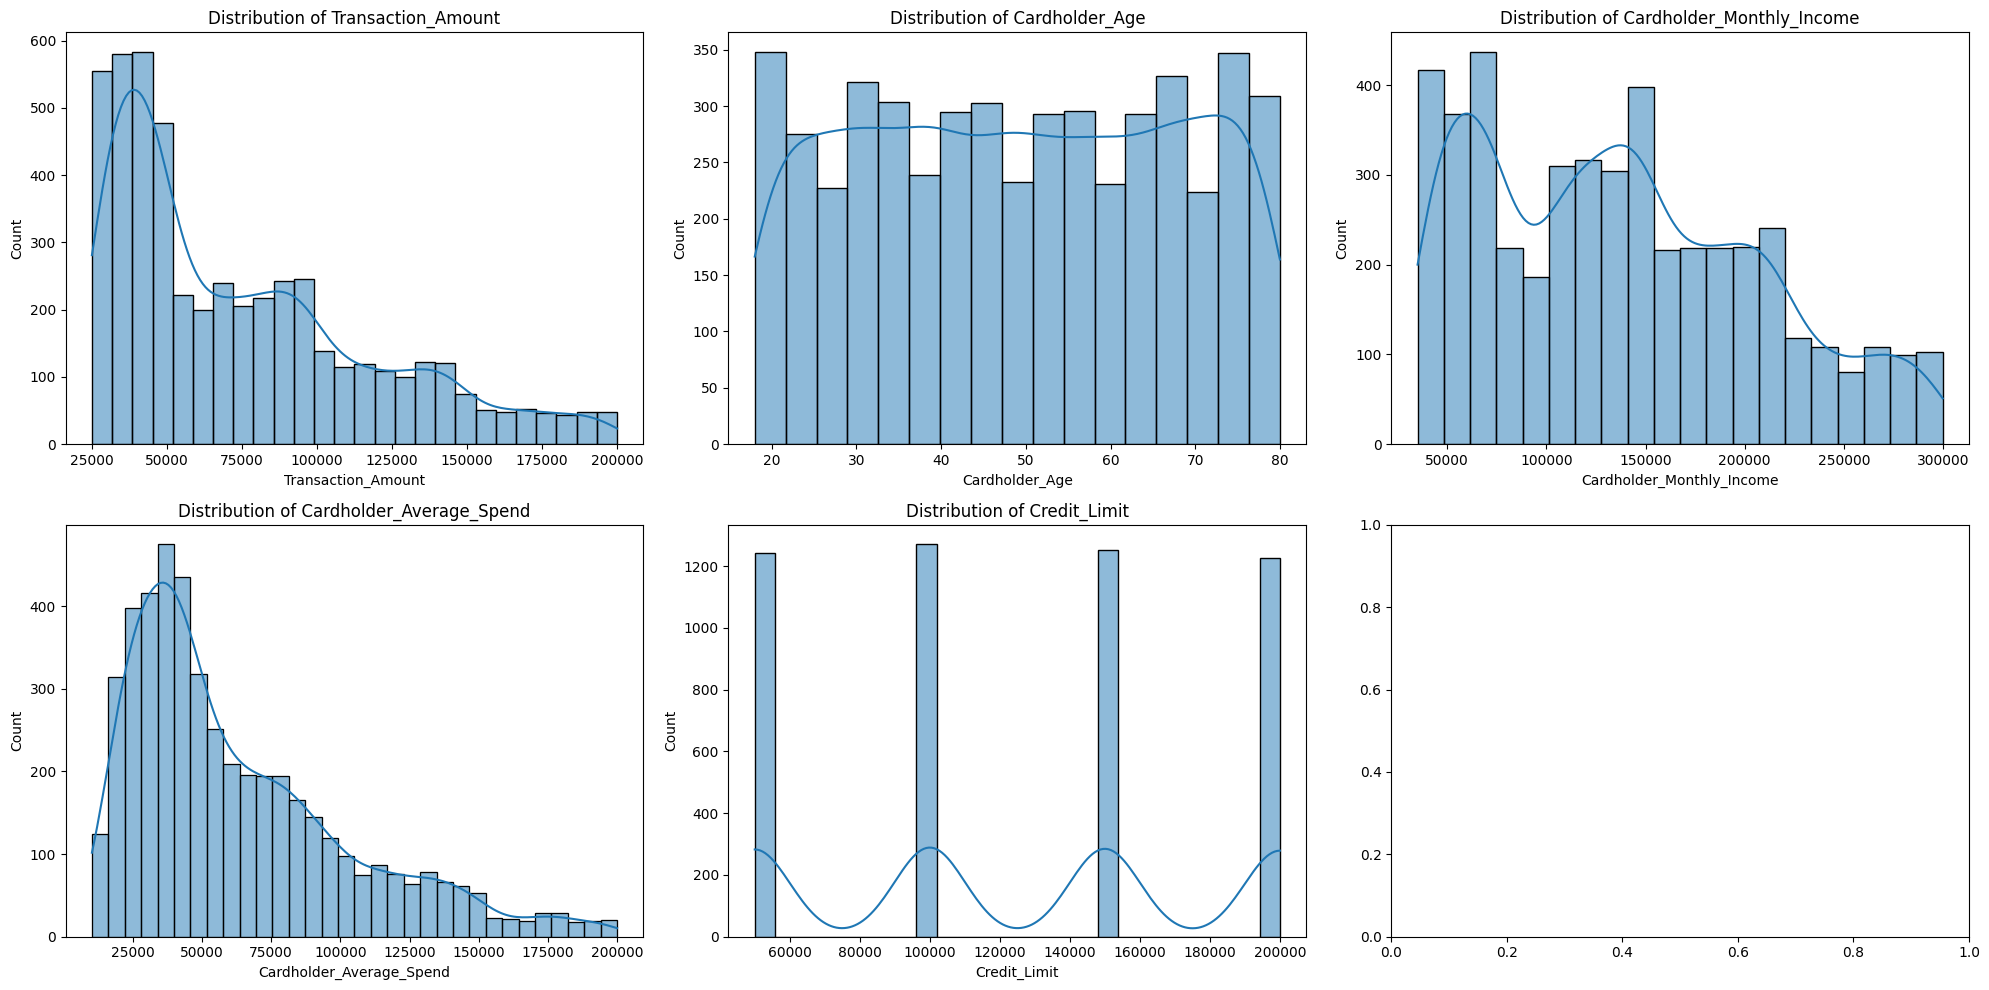

In [14]:
# Analyzing Numerical columns with discribtive statistics
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
axes = axes.flatten()
numerical_columns = df2.select_dtypes(include=['number']).columns
for i, col in enumerate(numerical_columns):
    sns.histplot(data=df2, x=col, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

## Bivariate Analysis

[Transaction amount, Age, Monthly income, card type, merchant_category, Average spend and credit limit]


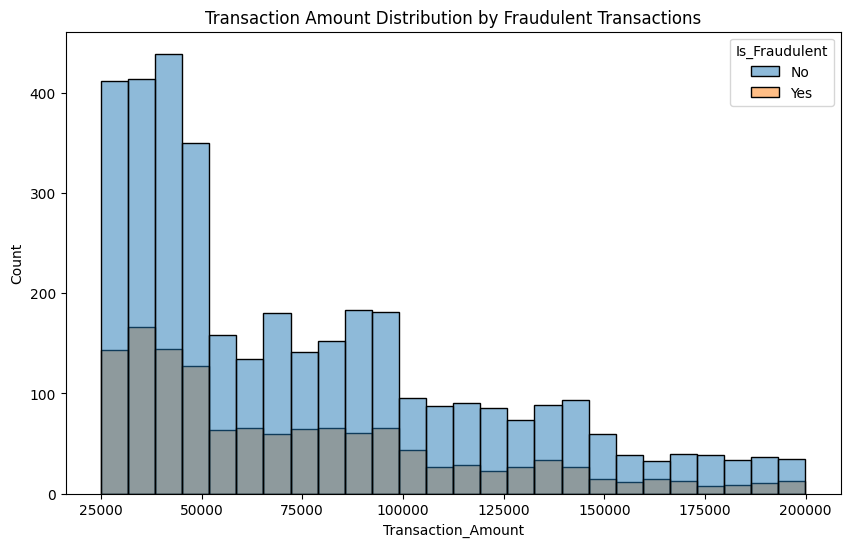

In [15]:
# Bivariate Visualization[Transaction amount vs Fraudulent]
plt.figure(figsize=(10, 6))
sns.histplot(data=df2, x='Transaction_Amount', hue='Is_Fraudulent')
plt.title('Transaction Amount Distribution by Fraudulent Transactions')
plt.show()


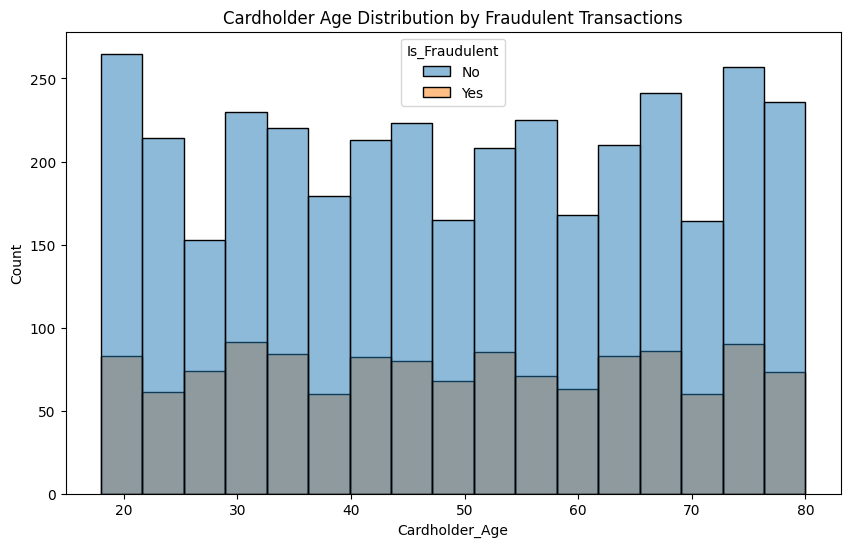

In [16]:
# Bivariate Analysis[Age vs Fraudulent]
plt.figure(figsize=(10, 6))
sns.histplot(data=df2, x='Cardholder_Age', hue='Is_Fraudulent')
plt.title('Cardholder Age Distribution by Fraudulent Transactions')
plt.show()


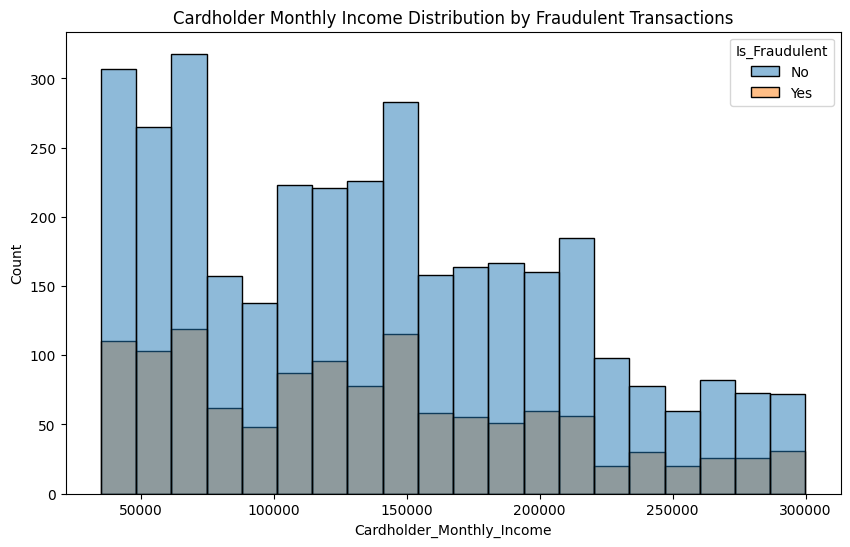

In [17]:
# Bivariate analysis [monthly income vs fraudulent]
plt.figure(figsize=(10, 6))
sns.histplot(data=df2, x='Cardholder_Monthly_Income', hue='Is_Fraudulent')
plt.title('Cardholder Monthly Income Distribution by Fraudulent Transactions')
plt.show()

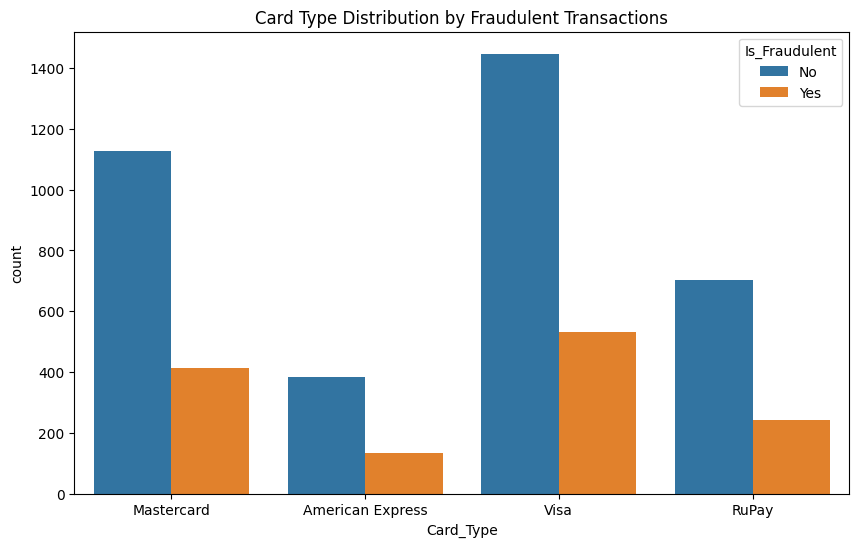

In [18]:
# Bivariate Analysis [card type vs fruadulent]
plt.figure(figsize=(10, 6))
sns.countplot(data=df2, x='Card_Type', hue='Is_Fraudulent')
plt.title('Card Type Distribution by Fraudulent Transactions')
plt.show()

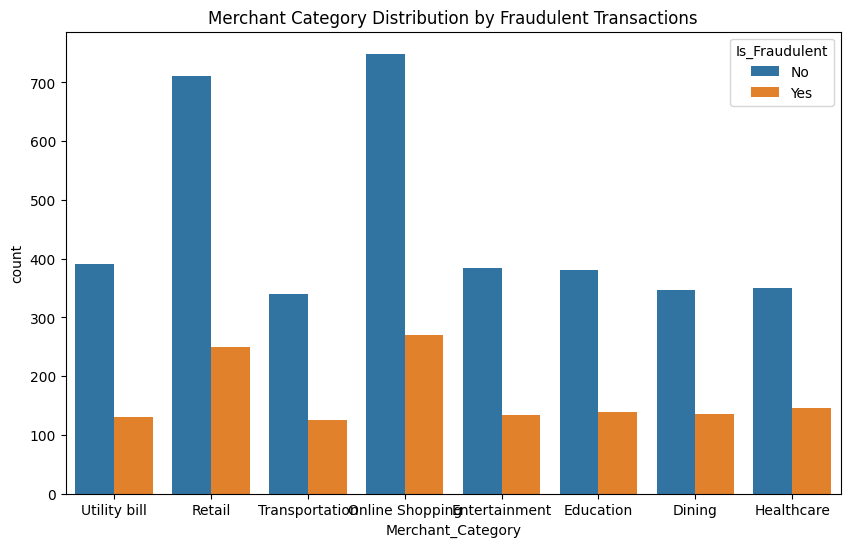

In [19]:
# Bivariate analysis [Merchant category vs fruadulent]
plt.figure(figsize=(10, 6))
sns.countplot(data=df2, x='Merchant_Category', hue='Is_Fraudulent')
plt.title('Merchant Category Distribution by Fraudulent Transactions')
plt.show()

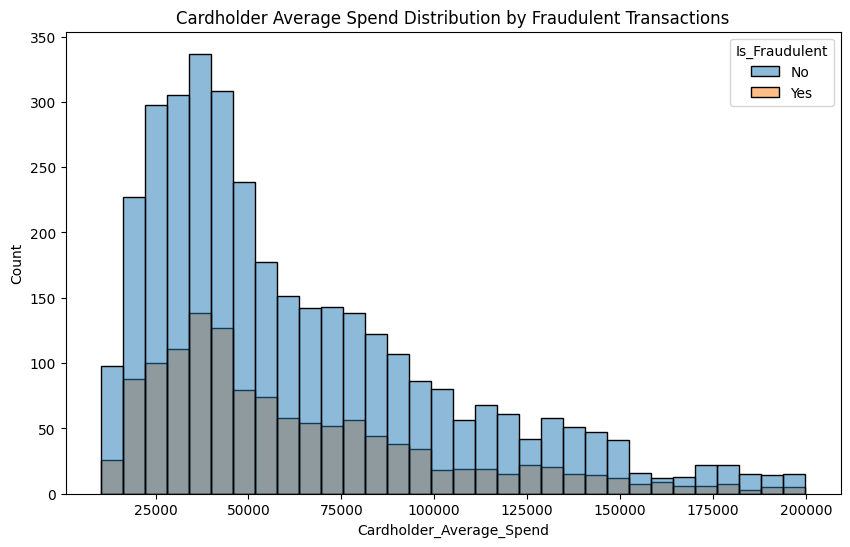

In [20]:
# Bivariate analysis [Average amount spend vs fraudulent]
plt.figure(figsize=(10, 6))
sns.histplot(data=df2, x='Cardholder_Average_Spend', hue='Is_Fraudulent')
plt.title('Cardholder Average Spend Distribution by Fraudulent Transactions')
plt.show()

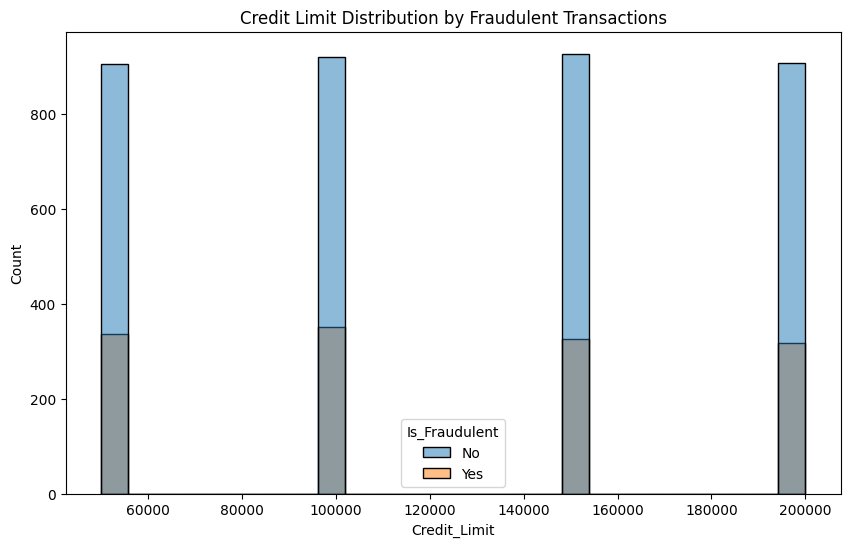

In [21]:
# Bivariate analysis [credit limit vs fraudulent]
plt.figure(figsize=(10, 6))
sns.histplot(data=df2, x='Credit_Limit', hue='Is_Fraudulent')
plt.title('Credit Limit Distribution by Fraudulent Transactions')
plt.show()


## Multivariate Analysis


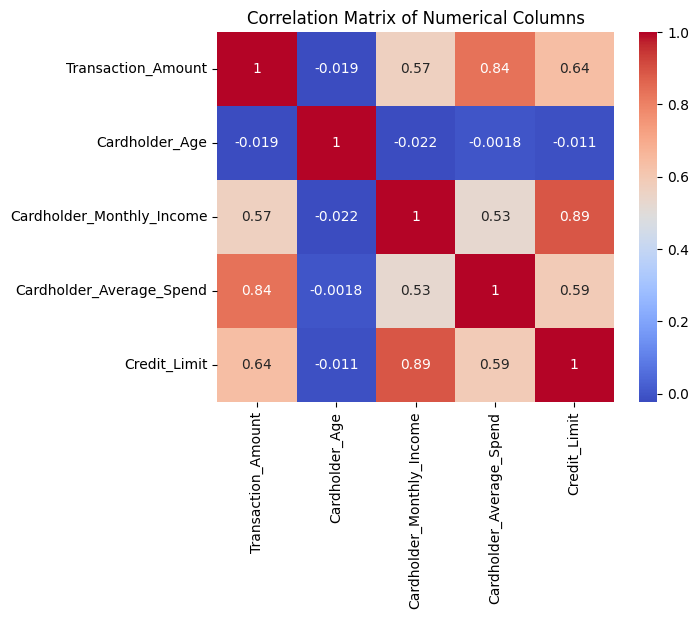

In [22]:
# Correlation between Numerical columns
sns.heatmap(df2[numerical_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

Strong Positive Correlations (Numerical_columns):

**Transaction_Amount** and **Cardholder_Average_Spend** (0.84): Higher transaction amounts are associated with higher average spending.

**Cardholder_Monthly_Income** and **Credit_Limit** (0.89): People with higher monthly income tend to have higher credit limits.

**Transaction_Amount** and **Credit_Limit** (0.64): Higher credit limits allow for larger transaction amounts.

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

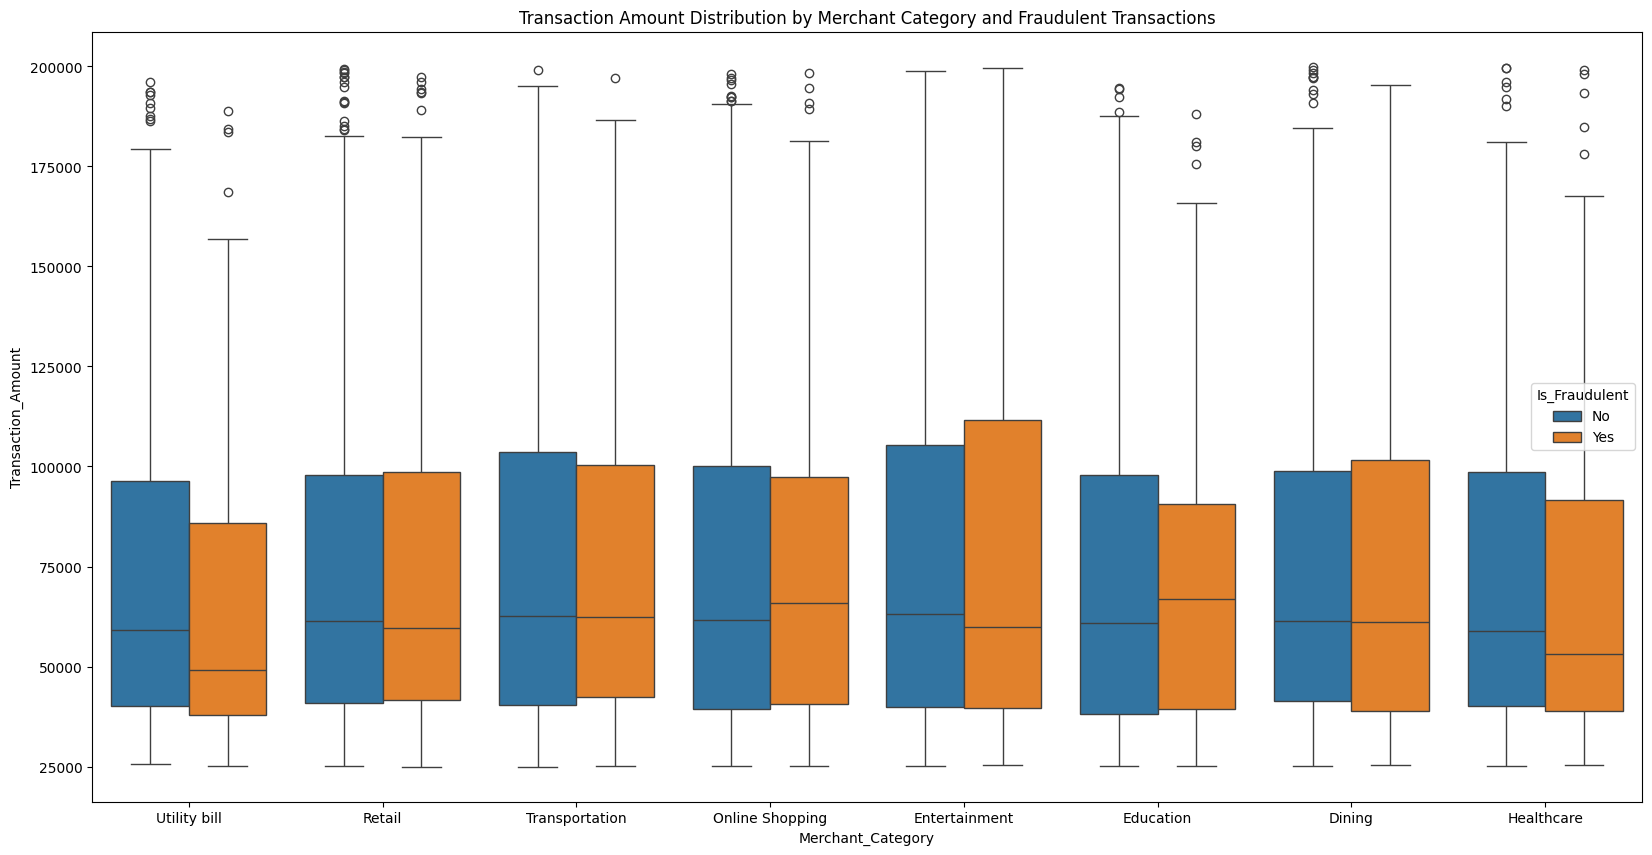

In [23]:
# Multivariate analysis [Merchant_Category + Transaction_Amount + Is_Fraudulent]
plt.figure(figsize=(20, 10))
sns.boxplot(data=df2, x='Merchant_Category', y='Transaction_Amount', hue='Is_Fraudulent')
plt.title('Transaction Amount Distribution by Merchant Category and Fraudulent Transactions')
plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

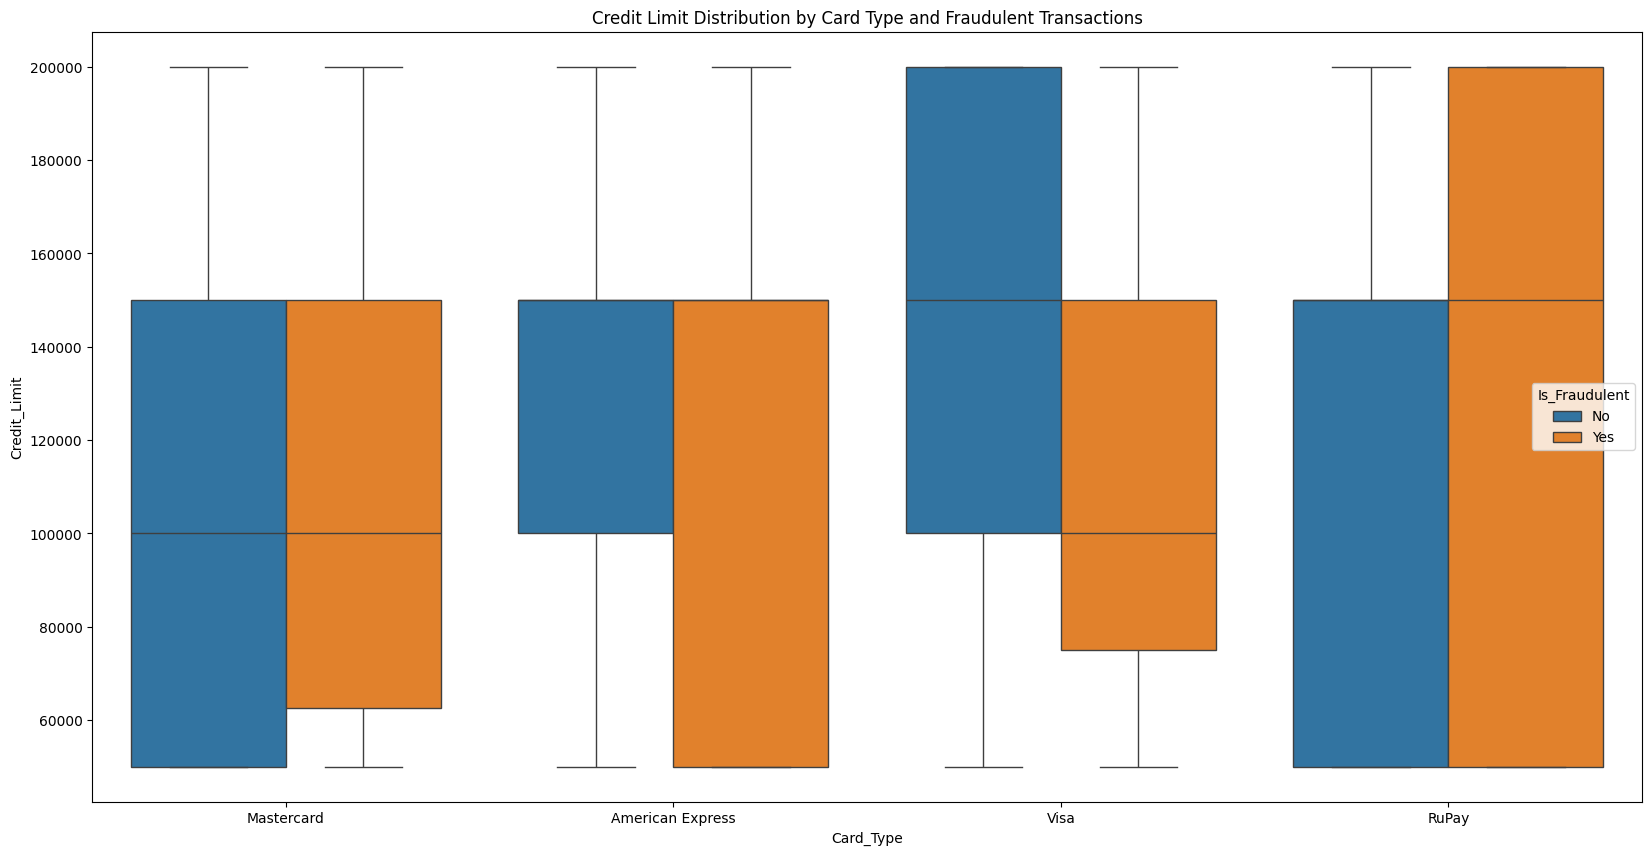

In [24]:
# Multivariate analysis [Card_Type + Credit_Limit + Is_Fraudulent]
plt.figure(figsize=(20, 10))
sns.boxplot(data=df2, x='Card_Type', y='Credit_Limit', hue='Is_Fraudulent')
plt.title('Credit Limit Distribution by Card Type and Fraudulent Transactions')
plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

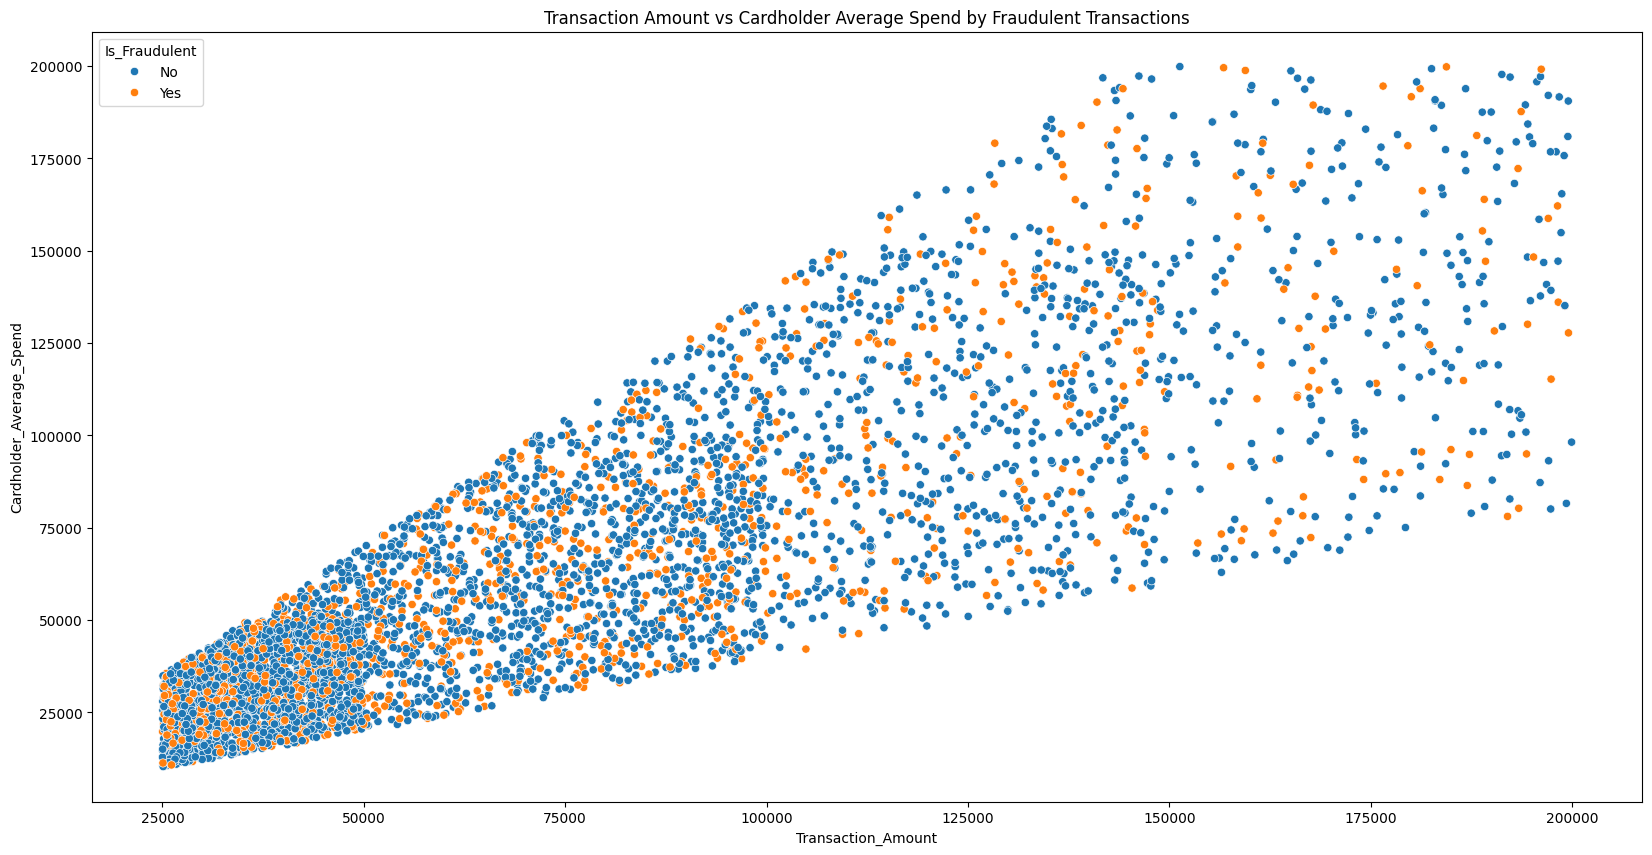

In [25]:
# Multivariate analysis [Transaction_Amount + Cardholder_Average_Spend + Is_Fraudulent]
plt.figure(figsize=(20, 10))
sns.scatterplot(data=df2, x='Transaction_Amount', y='Cardholder_Average_Spend', hue='Is_Fraudulent')
plt.title('Transaction Amount vs Cardholder Average Spend by Fraudulent Transactions')
plt


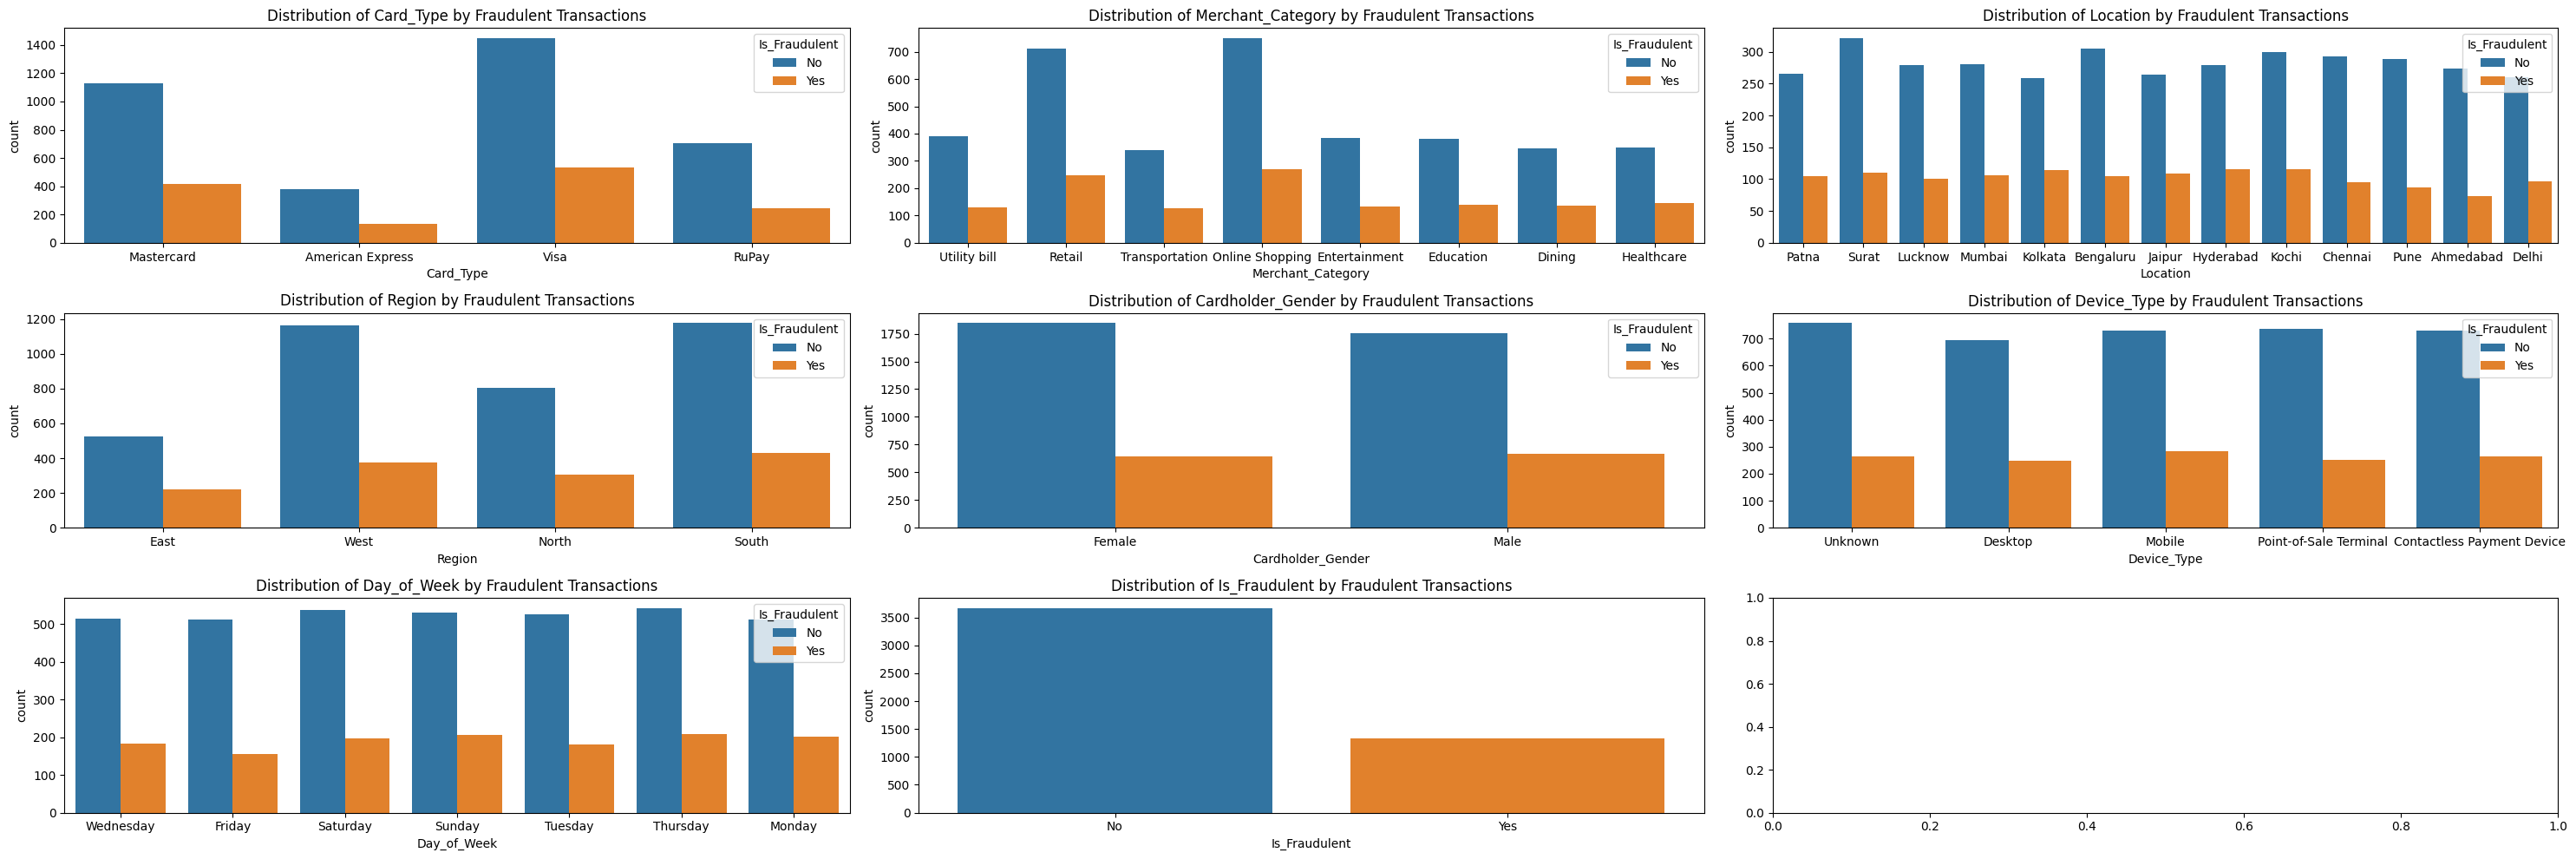

In [26]:
# Correlation between Categorical fetures with Fraud
categorical_columns = df2.select_dtypes(include=['object']).columns
categorical_columns = [col for col in categorical_columns if col not in ['Transaction_ID', 'Transaction_DateTime']]
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(30, 10))
axes = axes.flatten()
for i, col in enumerate(categorical_columns):
    sns.countplot(data=df2, x=col, hue='Is_Fraudulent', ax=axes[i])
    axes[i].set_title(f'Distribution of {col} by Fraudulent Transactions')
plt.tight_layout()
plt.show()

1. Visa, Retail, Online Shopping, and South/West regions are more prone to fraud.
2. Male cardholders and mobile transactions may have a slightly higher fraud risk.
3. Fraud is not concentrated on a specific day but is consistently present.
4. Fraud seems to be evenly distributed across categories but is more concentrated in high-volume transaction categories.
5. Fraudulent transactions are present across all card types, but Visa has the most fraudulent cases.

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

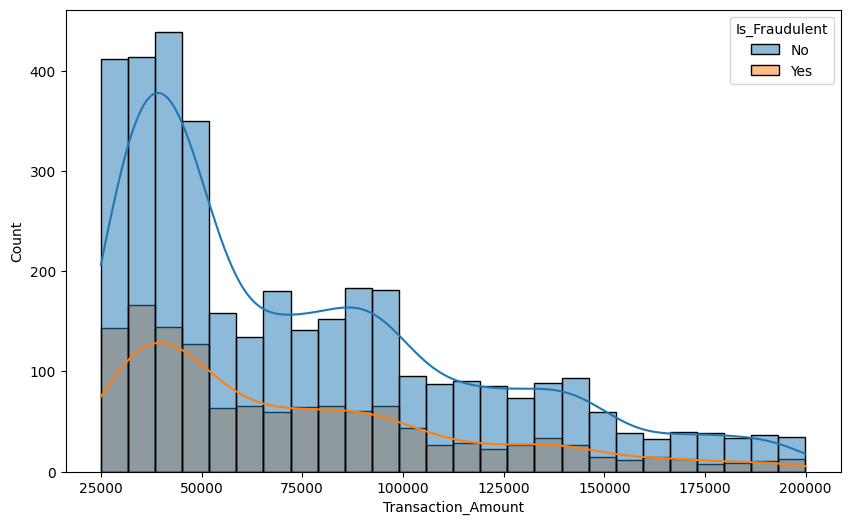

In [27]:
# Visualize the distribution of transaction amount for fraudulent vs non-fraudulent
plt.figure(figsize=(10, 6))
sns.histplot(data=df2, x='Transaction_Amount', hue='Is_Fraudulent', kde=True)
plt

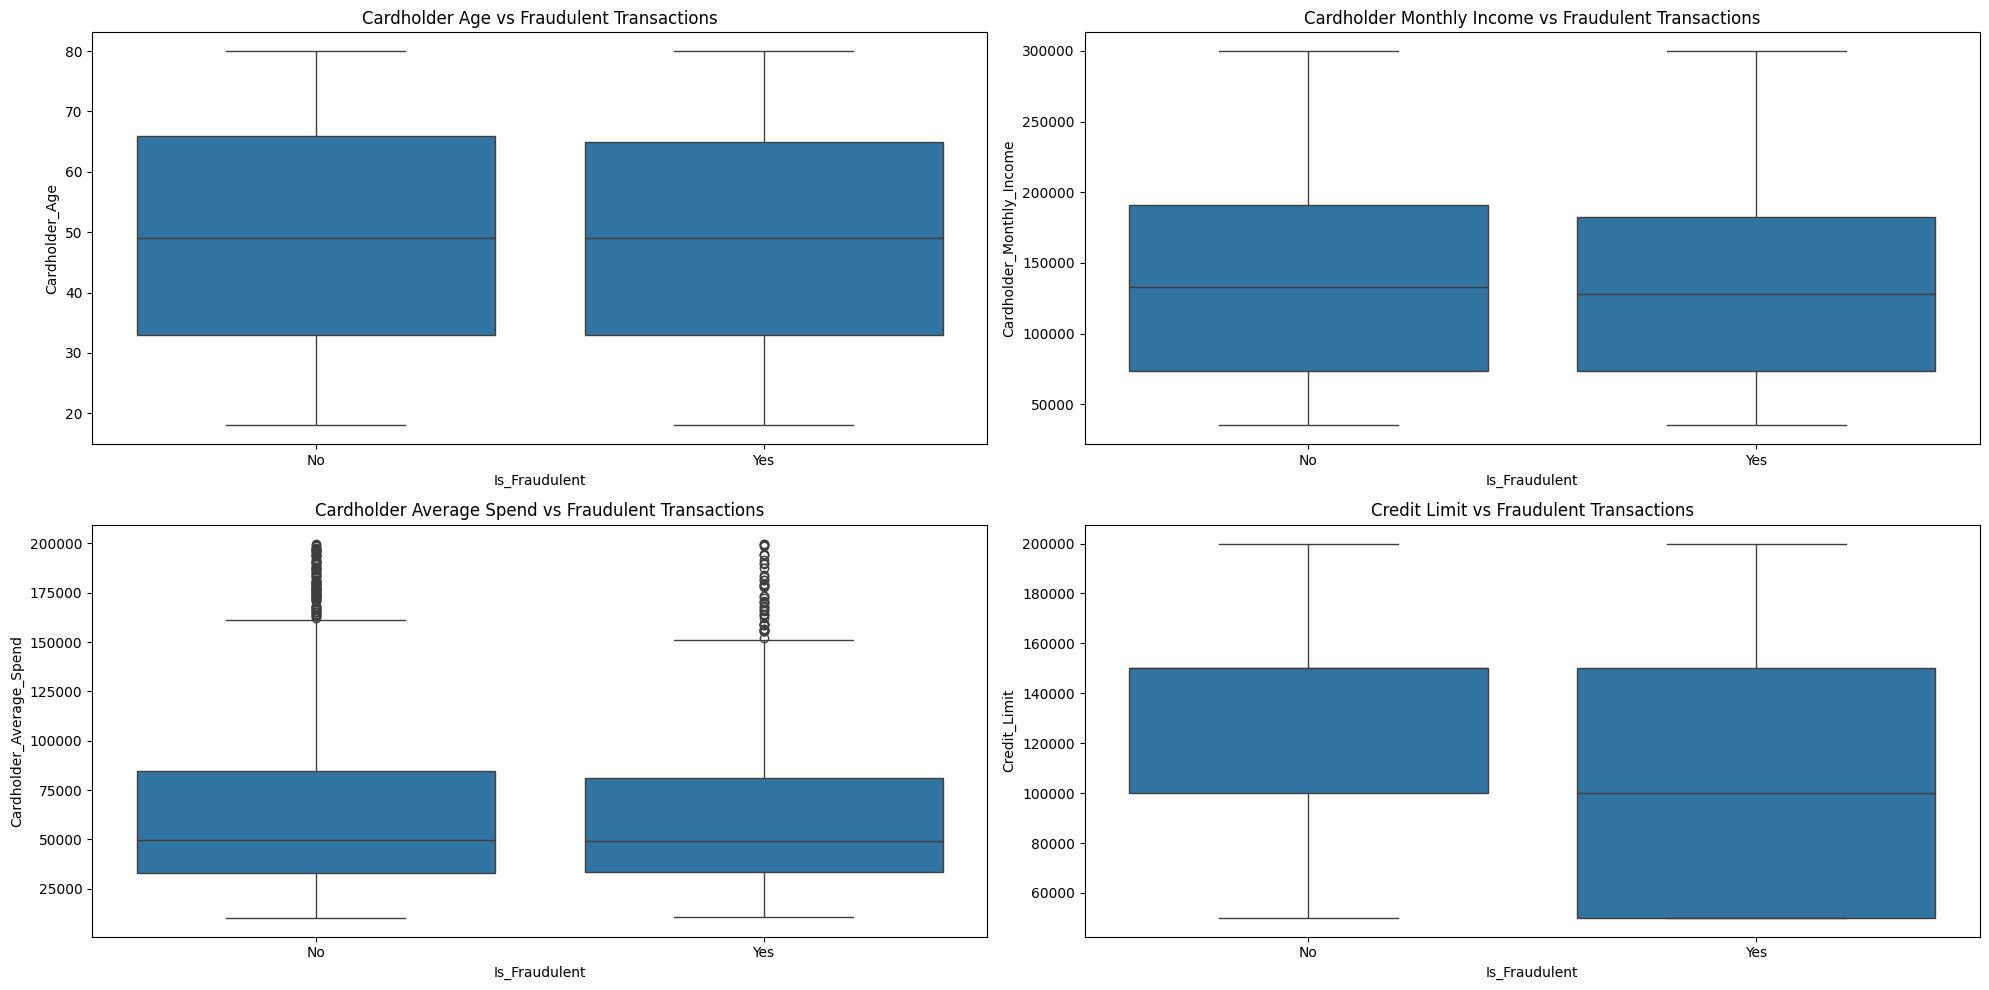

In [28]:
# Investigate whether certain features are more susceptible to fraud.
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
axes = axes.flatten()
sns.boxplot(data=df2, x='Is_Fraudulent', y='Cardholder_Age', ax=axes[0])
axes[0].set_title('Cardholder Age vs Fraudulent Transactions')
sns.boxplot(data=df2, x='Is_Fraudulent', y='Cardholder_Monthly_Income', ax=axes[1])
axes[1].set_title('Cardholder Monthly Income vs Fraudulent Transactions')
sns.boxplot(data=df2, x='Is_Fraudulent', y='Cardholder_Average_Spend', ax=axes[2])
axes[2].set_title('Cardholder Average Spend vs Fraudulent Transactions')
sns.boxplot(data=df2, x='Is_Fraudulent', y='Credit_Limit', ax=axes[3])
axes[3].set_title('Credit Limit vs Fraudulent Transactions')
plt.tight_layout()
plt.show()


**Observation:**

None of the variables show a strong difference between fraudulent and non-fraudulent transactions.

Outliers exist in spending and income, suggesting that some individuals have significantly higher spending patterns.

# Data Preprocessing

Based on the EDA there are missing values in ['Card_Type', 'Merchant_Category', 'Transaction_Amount','Cardholder_Age', 'Cardholder_Gender','Cardholder_Monthly_Income','Cardholder_Average_Spend', 'Credit_Limit', 'Device_Type'],

## Handling Missing Values

Imputing Numerical Columns using KNN Imputation

In [29]:
# Handling Missing Values in Numerical Columns(Transaction_Amount, Cardholder_Age, Cardholder_Monthly_Income, Cardholder_Average_Spend, Credit_Limit)
df2.head()
# Impute missing value by KNN Imputation for numerical columns
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)
df2[df2.select_dtypes(include=['number']).columns]= knn_imputer.fit_transform(df2.select_dtypes(include=['number']))
print(df2)
df2.isnull().sum()

     Transaction_ID         Card_Type Merchant_Category  Transaction_Amount  \
0          W963UK57        Mastercard      Utility bill             27214.0   
1          V606KV56  American Express            Retail             83956.0   
2          R531NU70              Visa    Transportation            193280.0   
3          T783GF79             RuPay   Online Shopping            167381.0   
4          K256ZN73             RuPay            Retail             81170.0   
...             ...               ...               ...                 ...   
4995       N307EM82             RuPay         Education             36508.0   
4996       J752EG45  American Express   Online Shopping             42920.0   
4997       S458OS59              Visa        Healthcare             33788.0   
4998       E863PD98             RuPay     Entertainment             38679.0   
4999       D501WH15              Visa        Healthcare             34672.0   

     Transaction_DateTime Location Region  Cardhold

,0
Transaction_ID,0
Card_Type,17
Merchant_Category,22
Transaction_Amount,0
Transaction_DateTime,0
Location,0
Region,0
Cardholder_Age,0
Cardholder_Gender,89
Cardholder_Monthly_Income,0


In [30]:
# Mode imputation for Categorical columns with mode
df2['Card_Type'] = df2['Card_Type'].fillna(df2['Card_Type'].mode()[0])
df2['Merchant_Category'] = df2['Merchant_Category'].fillna(df2['Merchant_Category'].mode()[0])
df2['Cardholder_Gender'] = df2['Cardholder_Gender'].fillna(df2['Cardholder_Gender'].mode()[0])
df2['Device_Type'] = df2['Device_Type'].fillna(df2['Device_Type'].mode()[0])
df2['Day_of_Week'] = df2['Day_of_Week'].fillna(df2['Day_of_Week'].mode()[0])
df2.isnull().sum()


,0
Transaction_ID,0
Card_Type,0
Merchant_Category,0
Transaction_Amount,0
Transaction_DateTime,0
Location,0
Region,0
Cardholder_Age,0
Cardholder_Gender,0
Cardholder_Monthly_Income,0


In [33]:
df2.head()

,Transaction_ID,Card_Type,Merchant_Category,Transaction_Amount,Transaction_DateTime,Location,Region,Cardholder_Age,Cardholder_Gender,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit,Device_Type,Day_of_Week,Is_Fraudulent
0,W963UK57,Mastercard,Utility bill,27214.0,2020-01-01 09:43:17,Patna,East,23.0,Female,94632.0,36369.65,100000.0,Unknown,Wednesday,No
1,V606KV56,American Express,Retail,83956.0,2020-01-03 16:26:13,Surat,West,49.0,Male,148118.0,89179.12,150000.0,Desktop,Friday,No
2,R531NU70,Visa,Transportation,193280.0,2020-01-04 03:40:49,Patna,East,39.2,Male,210921.0,106668.60,200000.0,Desktop,Saturday,No
3,T783GF79,RuPay,Online Shopping,167381.0,2020-01-04 14:56:24,Surat,West,52.0,Female,148070.0,173155.52,200000.0,Desktop,Saturday,Yes
4,K256ZN73,RuPay,Retail,81170.0,2020-01-04 17:26:47,Lucknow,North,37.0,Female,174470.0,52713.09,200000.0,Mobile,Saturday,No


## Outliers

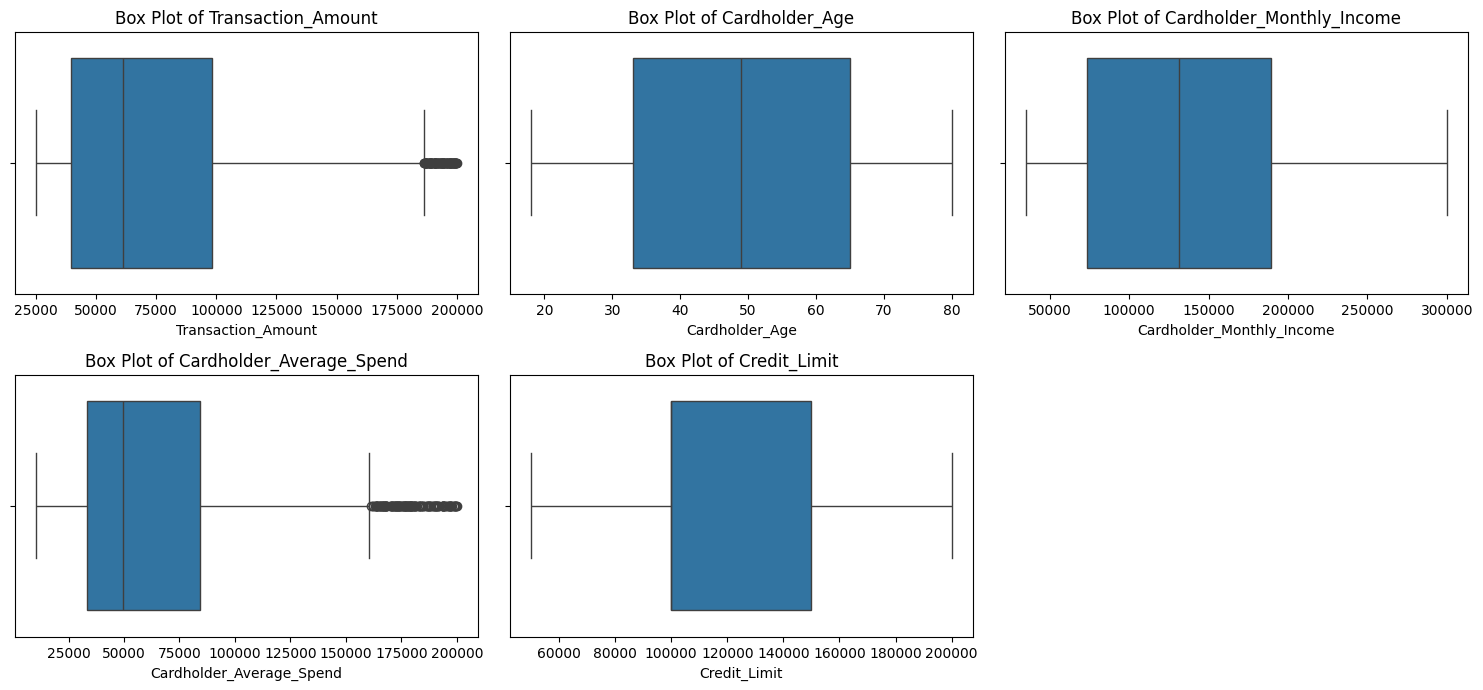

In [31]:
#Finding outliers through box plot for nemerical columns
numerical_columns = df2.select_dtypes(include=['number']).columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns):
    plt.subplot(3, 3, i+1)
    sns.boxplot(data=df2, x=col)
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()


As per the above box plot Outliers present in cardholder_average_spend and Transaction_Amount columns. we can also identify and remove outliers using IQR - Inter Quartile Range

In [32]:
# Check for outliers in numerical features using statistical methods IQR (Interquartile Range)
Q1 = df2['Cardholder_Average_Spend'].quantile(0.25)
Q3 = df2['Cardholder_Average_Spend'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

Lower Bound: -42849.26625, Upper Bound: 160471.60375


In [33]:
Q1 = df2['Transaction_Amount'].quantile(0.25)
Q3 = df2['Transaction_Amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

Lower Bound: -48231.75, Upper Bound: 186374.25


In [34]:
# Removing outliers
df2_Outliers = df2[(df2['Cardholder_Average_Spend'] >= lower_bound) & (df2['Cardholder_Average_Spend'] <= upper_bound)]
df2_Outliers_removed = df2_Outliers[(df2_Outliers['Transaction_Amount'] >= lower_bound) | (df2_Outliers['Transaction_Amount'] <= upper_bound)]
print(f"\nNo.of rows after removal of Outliers: {df2_Outliers_removed.shape[0]}")


No.of rows after removal of Outliers: 4953


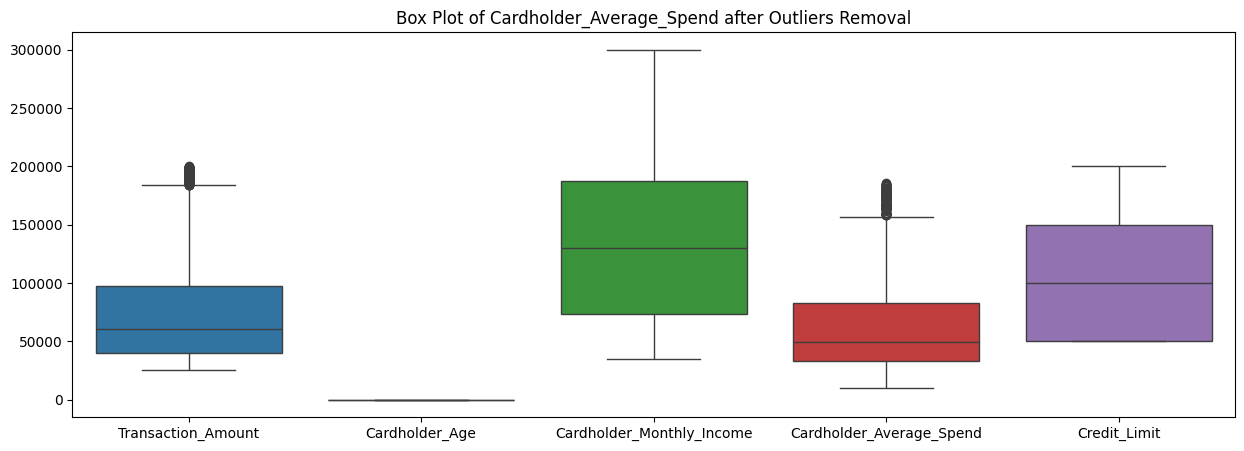

In [35]:
# Boxplot visual after Outliers removal
plt.figure(figsize=(15, 5))
sns.boxplot(data=df2_Outliers_removed)
plt.title('Box Plot of Cardholder_Average_Spend after Outliers Removal')
plt.show()

Boxplot represents that the ouliers has removed, Although some skewness there in Transaction_amount and Cardholder_Average_Spend.

In [36]:
df2_Outliers_removed.describe()

,Transaction_Amount,Cardholder_Age,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit
count,4953.000000,4953.000000,4953.000000,4953.000000,4953.000000
mean,73769.708904,49.142096,136410.081849,62012.553928,123882.495457
std,42203.479714,18.198815,68805.099442,38101.928709,55425.435678
min,25008.000000,18.000000,35005.000000,10282.410000,50000.000000
25%,39645.000000,33.000000,73019.000000,33224.240000,50000.000000
50%,60282.000000,49.000000,130102.000000,49282.470000,100000.000000
75%,97354.000000,65.000000,187232.000000,82777.440000,150000.000000
max,199923.000000,80.000000,299907.000000,185603.390000,200000.000000


## Skewness

In [50]:
from sklearn.neighbors import KernelDensity
df3 = df2_Outliers_removed.copy()
df3.shape

(4953, 15)

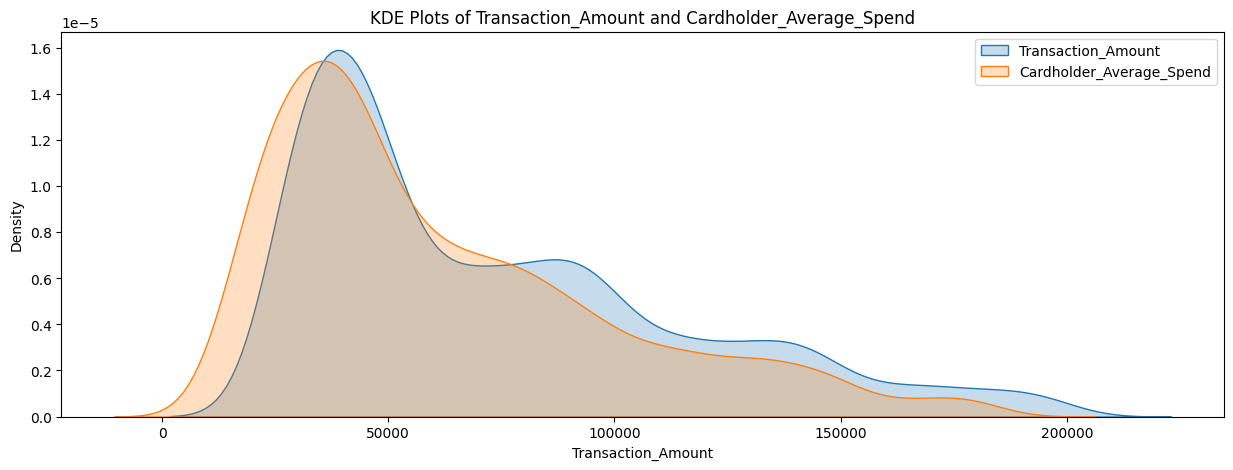

In [51]:
# Skewness in Transaction_amount and Cardholder_Average_Spend through Kde plot
plt.figure(figsize=(15, 5))
sns.kdeplot(data=df3, x='Transaction_Amount', fill=True, label='Transaction_Amount')
sns.kdeplot(data=df3, x='Cardholder_Average_Spend', fill=True, label='Cardholder_Average_Spend')
plt.title('KDE Plots of Transaction_Amount and Cardholder_Average_Spend')
plt.legend()

In [52]:
# Calcualting skewness score for numerical columns
numerical_columns = ['Transaction_Amount', 'Cardholder_Age', 'Cardholder_Monthly_Income', 'Cardholder_Average_Spend']
skewness = df3[numerical_columns].skew()
print(skewness)

Transaction_Amount           0.977301
Cardholder_Age              -0.011807
Cardholder_Monthly_Income    0.425066
Cardholder_Average_Spend     1.049186
dtype: float64


As per the above KDPlot and Skewness score  it clearly represents that the right side skewness present in  the below columns [Transaction_Amount, Cardholder_Average_Spend]. Inorder to remove the skewness i'm applying Log or square root Transformation to improve the distribution of above three columns.

In [53]:
# Log Transformation
Transaction_Amount_log = np.log(df3['Transaction_Amount']).skew()
Cardholder_Average_Spend_log = np.log(df3['Cardholder_Average_Spend']).skew()
Cardholder_Monthly_Income_log = np.log(df3['Cardholder_Monthly_Income']).skew()

# Square-root Transformation
Transaction_Amount_sqrt = np.sqrt(df3['Transaction_Amount']).skew()
Cardholder_Average_Spend_sqrt = np.sqrt(df3['Cardholder_Average_Spend']).skew()
Cardholder_Monthly_Income_sqrt = np.sqrt(df3['Cardholder_Monthly_Income']).skew()

print(f"Log Transformation: {Transaction_Amount_log}, {Cardholder_Average_Spend_log}, {Cardholder_Monthly_Income_log}")
print(f"Squar-root Transformation: {Transaction_Amount_sqrt}, {Cardholder_Average_Spend_sqrt}, {Cardholder_Monthly_Income_sqrt}")

Log Transformation: 0.20642095719420356, -0.01918938853245338, -0.37746454728012285
Squar-root Transformation: 0.5809148677161371, 0.5380552576924672, 0.025690977328616967


When comparing both transformation and it shows both Log_transformation  and Square-root_transformation clearly removes the right side skewness.  both gives the best result for each columns, Hence we can compare with skewness score and choose the best.

In [54]:
df3['Transaction_Amount_log'] = np.log(df3['Transaction_Amount'])
df3['Cardholder_Average_Spend_sqrt'] = np.log(df3['Cardholder_Average_Spend'])
df3['Cardholder_Monthly_Income_sqrt'] = np.sqrt(df3['Cardholder_Monthly_Income'])

As per above result we can go with the skewness score with positive value. log transformation resulted in a negative value, it suggests that the input might contain zero or negative values, which can be problematic because log transformation is only defined for positive values. Hence i have choosen the below columns for futher evaluation
[Transaction_Amount_log, Cardholder_Average_Spend_sqrt, Cardholder_Monthly_Income_sqrt]

# Feature Engineering

In [55]:
#Finding categorical columns
categorical_columns = df3.select_dtypes(include=['object']).columns
print(categorical_columns)

Index(['Transaction_ID', 'Card_Type', 'Merchant_Category',
       'Transaction_DateTime', 'Location', 'Region', 'Cardholder_Gender',
       'Device_Type', 'Day_of_Week', 'Is_Fraudulent'],
      dtype='object')


In [56]:
# Encoding categorical columns
from sklearn.preprocessing import LabelEncoder
categorical_columns = ['Card_Type', 'Merchant_Category', 'Location', 'Region', 'Cardholder_Gender', 'Device_Type', 'Day_of_Week']
label_encoder = LabelEncoder()
for col in categorical_columns:
    df3[col] = label_encoder.fit_transform(df3[col])
df3

,Transaction_ID,Card_Type,Merchant_Category,Transaction_Amount,Transaction_DateTime,Location,Region,Cardholder_Age,Cardholder_Gender,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit,Device_Type,Day_of_Week,Is_Fraudulent,Transaction_Amount_log,Cardholder_Average_Spend_sqrt,Cardholder_Monthly_Income_sqrt
0,W963UK57,1,7,27214.0,2020-01-01 09:43:17,10,0,23.0,0,94632.0,36369.65,100000.0,4,6,No,10.211487,10.501490,307.623146
1,V606KV56,0,5,83956.0,2020-01-03 16:26:13,12,3,49.0,1,148118.0,89179.12,150000.0,1,0,No,11.338048,11.398402,384.861014
2,R531NU70,3,6,193280.0,2020-01-04 03:40:49,10,0,39.2,1,210921.0,106668.60,200000.0,1,2,No,12.171895,11.577482,459.261363
3,T783GF79,2,4,167381.0,2020-01-04 14:56:24,12,3,52.0,0,148070.0,173155.52,200000.0,1,2,Yes,12.028028,12.061945,384.798649
4,K256ZN73,2,5,81170.0,2020-01-04 17:26:47,8,1,37.0,0,174470.0,52713.09,200000.0,2,2,No,11.304301,10.872619,417.696062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,N307EM82,2,1,36508.0,2023-12-29 09:22:23,3,1,33.0,0,63015.0,34192.55,50000.0,0,0,Yes,10.505287,10.439763,251.027887
4996,J752EG45,0,4,42920.0,2023-12-29 19:59:13,2,2,52.0,0,115859.6,19680.39,100000.0,0,0,No,10.667093,9.887378,340.381551
4997,S458OS59,3,3,33788.0,2023-12-30 07:06:38,11,3,56.0,1,60868.0,33876.96,50000.0,1,2,No,10.427861,10.430490,246.714410
4998,E863PD98,2,2,38679.0,2023-12-30 07:50:02,2,2,60.0,1,66948.0,32988.22,50000.0,1,2,No,10.563052,10.403906,258.743116


In [57]:
# Encoding Time stamp columns
df3['Transaction_DateTime'] = pd.to_datetime(df3['Transaction_DateTime'])
df3['Transaction_Hour'] = df3['Transaction_DateTime'].dt.hour
df3['Transaction_Day'] = df3['Transaction_DateTime'].dt.day
df3['Transaction_Month'] = df3['Transaction_DateTime'].dt.month
df3['Transaction_Year'] = df3['Transaction_DateTime'].dt.year
df3['Is_weekend'] = (df3['Transaction_DateTime'].dt.dayofweek >= 5).astype(int)
df3['Is_Fraudulent'] = df3['Is_Fraudulent'].map({'No':0, 'Yes':1}).astype(int)
df3.head()

,Transaction_ID,Card_Type,Merchant_Category,Transaction_Amount,Transaction_DateTime,Location,Region,Cardholder_Age,Cardholder_Gender,Cardholder_Monthly_Income,...,Day_of_Week,Is_Fraudulent,Transaction_Amount_log,Cardholder_Average_Spend_sqrt,Cardholder_Monthly_Income_sqrt,Transaction_Hour,Transaction_Day,Transaction_Month,Transaction_Year,Is_weekend
0,W963UK57,1,7,27214.0,2020-01-01 09:43:17,10,0,23.0,0,94632.0,...,6,0,10.211487,10.501490,307.623146,9,1,1,2020,0
1,V606KV56,0,5,83956.0,2020-01-03 16:26:13,12,3,49.0,1,148118.0,...,0,0,11.338048,11.398402,384.861014,16,3,1,2020,0
2,R531NU70,3,6,193280.0,2020-01-04 03:40:49,10,0,39.2,1,210921.0,...,2,0,12.171895,11.577482,459.261363,3,4,1,2020,1
3,T783GF79,2,4,167381.0,2020-01-04 14:56:24,12,3,52.0,0,148070.0,...,2,1,12.028028,12.061945,384.798649,14,4,1,2020,1
4,K256ZN73,2,5,81170.0,2020-01-04 17:26:47,8,1,37.0,0,174470.0,...,2,0,11.304301,10.872619,417.696062,17,4,1,2020,1


# Feature Selection

In [58]:
# Finding Relevent features for predicting fraudulant transaction
from sklearn.feature_selection import SelectKBest,f_regression
X = df3.drop(columns = ['Transaction_ID','Transaction_DateTime','Is_Fraudulent','Transaction_Hour'])
y = df3['Is_Fraudulent'] # Target Variable

In [59]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4953 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Transaction_ID                  4953 non-null   object        
 1   Card_Type                       4953 non-null   int64         
 2   Merchant_Category               4953 non-null   int64         
 3   Transaction_Amount              4953 non-null   float64       
 4   Transaction_DateTime            4953 non-null   datetime64[ns]
 5   Location                        4953 non-null   int64         
 6   Region                          4953 non-null   int64         
 7   Cardholder_Age                  4953 non-null   float64       
 8   Cardholder_Gender               4953 non-null   int64         
 9   Cardholder_Monthly_Income       4953 non-null   float64       
 10  Cardholder_Average_Spend        4953 non-null   float64       
 11  Credit_Li

In [60]:
Select = SelectKBest(score_func=f_regression, k=9)
X_new = Select.fit_transform(X, y)
selected_features = X.columns[Select.get_support()]
print("Selected Relevent Features: ",selected_features)

Selected Relevent Features:  Index(['Transaction_Amount', 'Region', 'Cardholder_Gender',
       'Cardholder_Monthly_Income', 'Cardholder_Average_Spend',
       'Cardholder_Monthly_Income_sqrt', 'Transaction_Day',
       'Transaction_Month', 'Transaction_Year'],
      dtype='object')


In [61]:
# Removing Redundant and irrelevent features
irrelevant_features = ['Device_Type', 'Day_of_Week', 'Card_Type', 'Transaction_ID', 'Transaction_DateTime']
df_cleaned = df3.drop(columns=irrelevant_features)

In [62]:
# Correlation Matrix
correlation_matrix = df_cleaned.corr()
correlation_matrix = correlation_matrix['Is_Fraudulent'].sort_values(ascending=False)
correlation_matrix

,Is_Fraudulent
Is_Fraudulent,1.000000
Cardholder_Gender,0.019095
Transaction_Day,0.018800
Transaction_Month,0.016264
Location,0.012701
Is_weekend,0.009770
Transaction_Hour,0.007014
Cardholder_Age,-0.004067
Cardholder_Average_Spend_sqrt,-0.008567
Credit_Limit,-0.011276


As per correlation Analysis, there are some irrelevent features [Device_Type , Day_of_Week , Card_Type ] that doesn't have significant relation with the prediction.

In [63]:
redundant_features = ['Transaction_Amount',  # Keep only log version
                      'Cardholder_Monthly_Income',  # Keep sqrt version
                      'Cardholder_Average_Spend']  # Keep sqrt version
df_cleaned = df_cleaned.drop(columns=redundant_features)

In [64]:
df_cleaned.head()
print ("Remaining features:\n", df_cleaned.columns)

Remaining features:
 Index(['Merchant_Category', 'Location', 'Region', 'Cardholder_Age',
       'Cardholder_Gender', 'Credit_Limit', 'Is_Fraudulent',
       'Transaction_Amount_log', 'Cardholder_Average_Spend_sqrt',
       'Cardholder_Monthly_Income_sqrt', 'Transaction_Hour', 'Transaction_Day',
       'Transaction_Month', 'Transaction_Year', 'Is_weekend'],
      dtype='object')


# Training and Testing

In [65]:
# Divide the dataset into training and testing sets to evaluate the model's performance.
from sklearn.model_selection import train_test_split
X = df_cleaned.drop(columns=['Is_Fraudulent'])
y = df_cleaned['Is_Fraudulent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Training set shape: {X_train.shape}, Testing set shape: {X_test.shape}")

#Ensure that both sets maintain the same distribution of fraudulent and non-fraudulent transactions to avoid data leakage.
# stratify - Prevents Data Leakage by ensuring the same proportion of fraud (1) and non-fraud (0) transactions in both training and test sets.
print("Class distribution in Training Set:\n", y_train.value_counts(normalize=True))
print("\nClass distribution in Testing Set:\n", y_test.value_counts(normalize=True))

Training set shape: (3962, 14), Testing set shape: (991, 14)
Class distribution in Training Set:
 Is_Fraudulent
0    0.733216
1    0.266784
Name: proportion, dtype: float64

Class distribution in Testing Set:
 Is_Fraudulent
0    0.733602
1    0.266398
Name: proportion, dtype: float64


# Feature Scaling

In [66]:
# Scaling Numerical columns using standard scalar scaling method
from sklearn.preprocessing import StandardScaler
numerical_columns = ['Transaction_Amount_log', 'Cardholder_Age', 'Cardholder_Monthly_Income_sqrt', 'Credit_Limit']
scaler = StandardScaler()
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])
df_cleaned

,Merchant_Category,Location,Region,Cardholder_Age,Cardholder_Gender,Credit_Limit,Is_Fraudulent,Transaction_Amount_log,Cardholder_Average_Spend_sqrt,Cardholder_Monthly_Income_sqrt,Transaction_Hour,Transaction_Day,Transaction_Month,Transaction_Year,Is_weekend
0,7,10,0,23.0,0,100000.0,0,10.211487,10.501490,307.623146,9,1,1,2020,0
1,5,12,3,49.0,1,150000.0,0,11.338048,11.398402,384.861014,16,3,1,2020,0
2,6,10,0,39.2,1,200000.0,0,12.171895,11.577482,459.261363,3,4,1,2020,1
3,4,12,3,52.0,0,200000.0,1,12.028028,12.061945,384.798649,14,4,1,2020,1
4,5,8,1,37.0,0,200000.0,0,11.304301,10.872619,417.696062,17,4,1,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1,3,1,33.0,0,50000.0,1,10.505287,10.439763,251.027887,9,29,12,2023,0
4996,4,2,2,52.0,0,100000.0,0,10.667093,9.887378,340.381551,19,29,12,2023,0
4997,3,11,3,56.0,1,50000.0,0,10.427861,10.430490,246.714410,7,30,12,2023,1
4998,2,2,2,60.0,1,50000.0,0,10.563052,10.403906,258.743116,7,30,12,2023,1


# Building ML Model

In [67]:
# a) Importing necessary modules and Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score


In [68]:
# b) Define a list or dictionary of classifiers to be evaluated; including Logistic Regression, Naive Bayes, Decision Tree, Random Forest, K-Nearest Neighbors, and SVM. Then, compute the accuracy score and F1-score for each classifier.
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'SVM': SVC()
}

In [69]:
# Inorder to store the evaluations i'm going to create a Dictionary
evaluation_results = {}

In [70]:
# Train the model
for name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    evaluation_results[name] = {'Accuracy': accuracy, 'F1-Score': f1}
    print(f"{name} - Accuracy: {accuracy}, F1-Score: {f1}")


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression - Accuracy: 0.7336024217961655, F1-Score: 0.0
Naive Bayes - Accuracy: 0.7336024217961655, F1-Score: 0.0
Decision Tree - Accuracy: 0.5983854692230071, F1-Score: 0.27106227106227104
Random Forest - Accuracy: 0.7305751765893037, F1-Score: 0.014760147601476014
K-Nearest Neighbors - Accuracy: 0.6811301715438951, F1-Score: 0.22926829268292684
SVM - Accuracy: 0.7336024217961655, F1-Score: 0.0


In [71]:
# C) Select a machine learning algorithm for binary classification with the highest accuracy or F1-score from the above step
# Find best model for binary classification with highest Accuracy
best_model = max(evaluation_results, key=lambda x: evaluation_results[x]['Accuracy'])
print(f"\nBest Model for Binary Classification: {best_model}")

# Find best model for binary classification with highest F1 score
best_model_f1 = max(evaluation_results, key=lambda x: evaluation_results[x]['F1-Score'])
print(f"Best Model for Binary Classification (F1-Score): {best_model_f1}")


Best Model for Binary Classification: Logistic Regression
Best Model for Binary Classification (F1-Score): Decision Tree


In [72]:
# d) Train the selected model using the training dataset and evaluate its performance using appropriate metrics like confusion matrix, accuracy, precision, recall, and F1-score.
from sklearn.metrics import confusion_matrix, classification_report

# Train the best model on the entire training set
best_classifier = classifiers[best_model]
best_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_classifier.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)


Confusion Matrix:
 [[727   0]
 [264   0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.73      1.00      0.85       727
           1       0.00      0.00      0.00       264

    accuracy                           0.73       991
   macro avg       0.37      0.50      0.42       991
weighted avg       0.54      0.73      0.62       991



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

As we can see,

High Accuracy but Poor Performance on Minority Class:

Accuracy is 73%, but this is misleading because the model is predicting only Class 0.
The recall for Class 1 is 0.00, meaning it doesn’t correctly classify any positive instances.

## Oversampling

Uing SMOTE to handling Imbalance dataset

In [73]:
# using smote
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
X_train, X_test, y_train, y_test = train_test_split(X_train_resampled, y_train_resampled, test_size=0.2, random_state=42)

In [74]:
classifiers_1 = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'SVM': SVC()
}

In [76]:
evaluation_reults_1 = {}

In [77]:
for name, classifier in classifiers_1.items():
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    evaluation_reults_1[name] = {'Accuracy': accuracy, 'F1-Score': f1}
    print(f"{name} - Accuracy: {accuracy}, F1-Score: {f1}")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression - Accuracy: 0.5895008605851979, F1-Score: 0.5848563968668408
Naive Bayes - Accuracy: 0.6342512908777969, F1-Score: 0.6490503715937241
Decision Tree - Accuracy: 0.6807228915662651, F1-Score: 0.6890192791282481
Random Forest - Accuracy: 0.774526678141136, F1-Score: 0.7648114901256733
K-Nearest Neighbors - Accuracy: 0.7065404475043029, F1-Score: 0.7534345625451916
SVM - Accuracy: 0.49569707401032703, F1-Score: 0.0


In [79]:
# e)Validate the model's performance on the testing dataset and interpret the results to assess its effectiveness in detecting fraudulent transactions.
from sklearn.metrics import confusion_matrix, classification_report
best_model_1 = max(evaluation_reults_1, key=lambda x: evaluation_reults_1[x]['Accuracy'])
print(f"\nBest Model for Binary Classification: {best_model_1}")
best_model

best_classifier_1 = classifiers_1[best_model_1]
best_classifier_1.fit(X_train, y_train)
y_pred = best_classifier_1.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)



Best Model for Binary Classification: Random Forest
Confusion Matrix:
 [[487  89]
 [158 428]]

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.85      0.80       576
           1       0.83      0.73      0.78       586

    accuracy                           0.79      1162
   macro avg       0.79      0.79      0.79      1162
weighted avg       0.79      0.79      0.79      1162



# Conclusion



**Random Forest Model**

Class 0: Precision = 76%, Recall = 85% (Model is correctly identifying most negatives)
Class 1: Precision = 83%, Recall = 73% (Model is correctly identifying positives but misses some)

Confusion Matrix:

[[487  89]    # 487 True Negatives, 89 False Positives
 [158 428]]   # 428 True Positives, 158 False Negatives

89 FP: Model mistakenly classified 89 0s as 1s
158 FN: Model failed to classify 158 1s correctly

F1-Scores (~0.78 - 0.80)

Indicates a well-balanced model for both classes.
Accuracy = 79%

Decent, but not always the best measure for imbalanced data.


